In [1]:
from GRpy.all import *
init_printing(use_unicode=True)

# Sphere:

Metric:
$$
g_{ab}(\theta, \phi)=
\begin{bmatrix}
a^2 & 0\\
 0 & a^2 \sin^2(\theta)
\end{bmatrix},
$$
with $a$ the radius of the sphere.

First we define the symbols for the coordinates $x^a=(\theta,\phi)$ and the constants:

In [2]:
a, theta, phi = symbols('a, theta, varphi', real=True)

Now we define the variable `gab` as a Metric depending on the coordinates, and asign the components:

In [3]:
gab = Metric((theta, phi))
gab[-0,-0] = a**2
gab[-0,-1] = 0
gab[-1,-0] = 0
gab[-1,-1] = (a**2)*(sin(theta))**2

The object `gab` is of type `GRpy.Tensor.Metric`, and has several associated methods:

In [4]:
type(gab)

GRpy.Tensor.Metric

In [5]:
gab.components

In [6]:
gab.getNonZero()

In [7]:
gab.symbol

In [8]:
gab.__str__()

The non-zero components of g_{ab} are:
(-1, -1) : a**2*sin(theta)**2
(0, 0) : a**2


The inverse is computed using `.invert()`:

In [9]:
ginv = gab.invert()

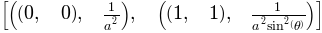

In [10]:
ginv.getNonZero()

In [11]:
ginv.__str__()

The non-zero components of g_inv are:
(0, 0) : a**(-2)
(1, 1) : 1/(a**2*sin(theta)**2)


The method `.invert()` computes the inverse:

The Christoffel symbols of the second kind $\{^a_{bc}\}$ are computed using the function `Christoffel`:

In [12]:
chris = Christoffel(gab)

In [13]:
chris.symbol

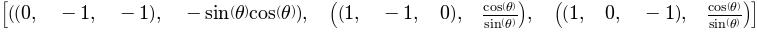

In [14]:
chris.getNonZero()

If we want access to a particular component, we can write:

In [15]:
chris.components[(0,-1,-1)]

Similarly, the Riemann tensor can be computed from the Christoffel symbols:

In [16]:
riem = Riemann(chris)

In [17]:
riem.symbol

In [18]:
riem.getNonZero()

By default, `Riemann()` computes the covariant components of the curvature. The completely contravariant components $R^{abcd}$ can then be computed using the method `.Riemann_cont`:

In [81]:
riem.Riemann_cont.symbol

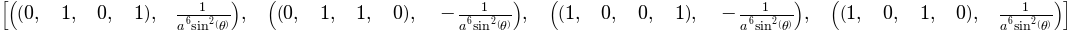

In [20]:
riem.Riemann_cont.getNonZero()

Similarly, `.Riemann_par` computes $R^{ab}_{\ \ cd}$:

In [21]:
riem.Riemann_par.symbol

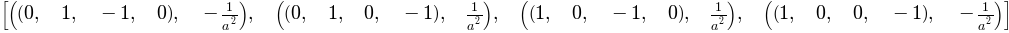

In [22]:
riem.Riemann_par.getNonZero()

The Ricci tensor of a given curvature tensor is computed using `Ricci()`, with the curvature tensor as argument:

In [23]:
ricc = Ricci(riem)
ricc.symbol

In [24]:
ricc.getNonZero()

The curvature scalar $R=g^{ab}R_{ab}$ can be computed using `Scalar(Metric, Ricci, Riemann)`:

In [25]:
scurv = Scurv(gab,ricc)
scurv

The Einstein tensor $G_{ab}=R_{ab}-g_{ab}R/2$ can be computed using `Einstein(metric, Ricci)`:

In [26]:
einstein = Einstein(gab, ricc)
einstein.getNonZero()

# Verifying:

Consider the following property of spaces with constant curvature:

$$ R_{abcd}=\alpha (g_{ad}g_{bc}-g_{bd}g_{ac}),$$
$$ R_{ab}= \alpha(d-1)g_{ab},$$

Then 
$$R = \alpha d(d-1)$$

In our example $d=2$ and $R=2/a^2$, and therefore $\alpha =1/a^2$.

In [27]:
alpha = 1/(a**2)

In [28]:
for i in range(2):
    for j in range(2):
        for m in range(2):
            for l in range(2):
                cosa = gab.components[-i,-m]*gab.components[-j,-l]-gab.components[-j,-m]*gab.components[-i,-l]
                print '(%d,%d,%d,%d)'%(i,j,m,l), cancel(riem.components[-i,-j,-m,-l])==simplify(alpha*cosa)

(0,0,0,0) True
(0,0,0,1) True
(0,0,1,0) True
(0,0,1,1) True
(0,1,0,0) True
(0,1,0,1) True
(0,1,1,0) True
(0,1,1,1) True
(1,0,0,0) True
(1,0,0,1) True
(1,0,1,0) True
(1,0,1,1) True
(1,1,0,0) True
(1,1,0,1) True
(1,1,1,0) True
(1,1,1,1) True


In [29]:
for i in range(2):
    for j in range(2):
        print '(%d,%d)'%(i,j), cancel(gab.components[-i,-j])==simplify(ricc.components[-i,-j]/(alpha))

(0,0) True
(0,1) True
(1,0) True
(1,1) True


# Killing Equation

Now we will compute the Killing equation for the vector field $\xi^a$, given by
$$
\xi^c\partial_c g_{ab}+g_{ac}\partial_b\xi^c+g_{bc}\partial_a\xi^c=0
$$

In [30]:
xi0 = Function('xi^0')(theta,phi)
xi1 = Function('xi^1')(theta,phi)

In [31]:
xi = XI((theta,phi))
xi[0] = xi0
xi[1] = xi1

In [32]:
K = Killing_Equation(xi,gab)
K.symbol

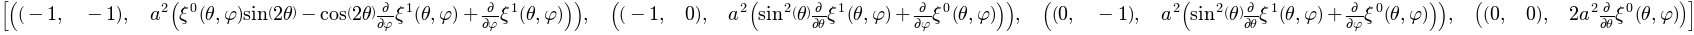

In [33]:
K.getNonZero()

We asign the independent components of the equation to the variables e1, e2 and e3:

In [34]:
e1=K.components[(-1,-1)]
e2=K.components[(-1,0)]
e3=K.components[(0,0)]

In [35]:
e3

The 3rd equation has a solution $\xi^0=f(\varphi)$. We sunstitute this solution in the other equations:

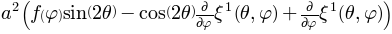

In [36]:
f = Function('f')(phi)
e1r=e1.subs(xi0,f)
e1r

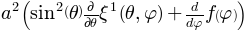

In [37]:
e2r=e2.subs(xi0,f)
e2r

Now we solve for $f(\varphi)$

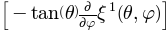

In [38]:
sf=solve(e1r,f)
sf

And substitute it back in equation 2:

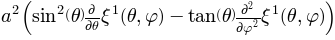

In [39]:
e2r2 = e2r.subs(f,sf[0]).doit()
e2r2

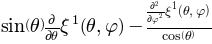

In [40]:
e2r3=trigsimp(e2r2/(a**2*sin(theta)))
e2r3

In [41]:
#g, h = map(Function, 'gh')
g = Function('g', real=True)(theta)
h = Function('h', real=True)(phi)

In [42]:
sep=pde_separate(Eq(e2r3),xi1,[g,h],strategy='mul')

In [43]:
n = Symbol('n', real=True, integer=True)

In [44]:
sg=dsolve(sep[0]+n**2)
sg

In [45]:
sh=dsolve(sep[1]+n**2)
sh

In [46]:
sxi1 = sg.rhs*sh.rhs
sxi1

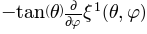

In [47]:
sf[0]

In [48]:
sf[0].subs(xi1,sxi1).doit()

# Checking Killing equations:

$$\xi^a_{1}(\theta,\varphi)=(\sin(\varphi),\cot(\theta)\cos(\theta)),$$

$$\xi^a_{2}(\theta,\varphi)=(\cos(\varphi),-\cot(\theta)\sin(\theta)),$$

$$\xi^a_{3}(\theta,\varphi)=(0,1),$$

$$
\xi^a=\alpha \xi^a_{1} + \beta \xi^a_{2} + \gamma \xi^a_{3}
$$

In [49]:
alpha, beta, gamma = symbols('alpha, beta, gamma')
xi1 = XI((theta,phi))
xi[0] = alpha*sin(phi) + beta*cos(phi) 
xi[1] = alpha*cot(theta)*cos(phi) - beta*cot(theta)*sin(phi)+  gamma

In [50]:
K = Killing_Equation(xi,gab)

In [51]:
K.getNonZero()

In [52]:
K.__str__()

All the components of K_{ab} are 0!


# Covariant derivative:

In [53]:
xi = XI((theta,phi))

In [54]:
xi0 = Function('xi^0')(theta,phi)
xi1 = Function('xi^1')(theta,phi)

In [55]:
xi[0]= xi0
xi[1]= xi1

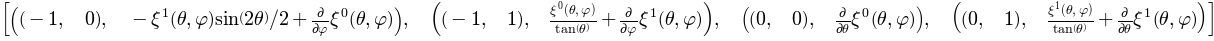

In [56]:
Cov_der = Covariant_Derivative(xi, chris)
Cov_der.getNonZero()

In [57]:
Cov_der.__str__()

The non-zero components of nabla_{a} are:
(-1, 0) : -xi^1(theta, varphi)*sin(2*theta)/2 + Derivative(xi^0(theta, varphi), varphi)
(-1, 1) : (xi^0(theta, varphi) + tan(theta)*Derivative(xi^1(theta, varphi), varphi))/tan(theta)
(0, 0) : Derivative(xi^0(theta, varphi), theta)
(0, 1) : (xi^1(theta, varphi) + tan(theta)*Derivative(xi^1(theta, varphi), theta))/tan(theta)


# Geodesic equation:

In [58]:
Geoeq = Geodesic_Equation(chris)
Geoeq.symbol

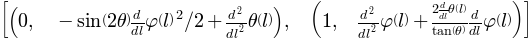

In [59]:
Geoeq.getNonZero()

In [60]:
Geoeq.__str__()

The non-zero components of (Geoeq)^{a} are:
0 : -sin(2*theta)*Derivative(varphi(l), l)**2/2 + Derivative(theta(l), l, l)
1 : (tan(theta)*Derivative(varphi(l), l, l) + 2*Derivative(theta(l), l)*Derivative(varphi(l), l))/tan(theta)


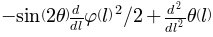

In [61]:
geq0 = Geoeq.components[0]
geq0

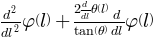

In [62]:
geq1 = Geoeq.components[1]
geq1